In [1]:
# Madhumita Roy
# Student Number-20193689
# Master in Management Analytics
# 021W
# MMA869
# October 18, 2020

In [2]:
import datetime
print(datetime.datetime.now())

In [3]:
import os
os.getcwd()

'C:\\Users\\ari62\\Documents\\Python Scripts\\Text_Analytics\\SentimentAnalysis_IndividialAssignment'

In [4]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.23.2.


In [5]:
# Importing the packages
import pandas as pd
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from collections import Counter 
# For performing mathematical operations
import math
# For replacing
import re
# For handling strings
import string

import sklearn.metrics

# Q1.a.

# Loading, Feature Engineering and Pre-processing the train dataset

In [6]:
# Importing the train dataset
train_df = pd.read_csv("sentiment_train.csv")
train_df.head()

,Sentence,Polarity
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
train_df.shape

(2202, 2)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  2202 non-null   object
 1   Polarity  2202 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.5+ KB


In [9]:
# Checking for missing data
train_df.isna().sum()

Sentence    0
Polarity    0
dtype: int64

No missing data

In [10]:
# Checking if the data is balanced
train_df["Polarity"].value_counts()

0    1113
1    1089
Name: Polarity, dtype: int64

Data is balanced

# Feature Engineering


In [11]:
#Word Count of each review
train_df['word_count'] = train_df['Sentence'].apply(lambda x: len(str(x).split(" ")))

#Character Count of each review
train_df['char_count'] = train_df['Sentence'].str.len() ## this also includes spaces

In [12]:
#Character count without punctuations
punctuation = ['!','"','#','$','%','&',"'",'(',')','*','+',',','-','.','/',':',';','<','=','>','?','@','[','\\',']','^','_','`','{','|','}','~','``',"''",'--']
def count_characters(data_df):
    reviewcharacters = []
    text_col = data_df['Sentence']
    for i in text_col:
        a = dict(Counter(i))
        b = {k:v for k, v in a.items() if k not in punctuation}
        c = sum(list(b.values()))
        reviewcharacters.append(c)
    data_df['reviewChars'] = reviewcharacters
    return data_df['reviewChars']
train_df['reviewChars'] = count_characters(train_df)


In [13]:
#Number of Punctuations

def numpunct(data_df):
    reviewPuncts = []
    for i in data_df['Sentence']:
        a = dict(Counter(i))
        b = {k:v for k,v in a.items() if k in punctuation}
        c = sum(list(b.values()))
        reviewPuncts.append(c)
    data_df['reviewPuncts'] = reviewPuncts
    return data_df['reviewPuncts']
train_df['reviewPuncts'] = numpunct(train_df)

In [14]:
# Ratio of Punctuations to reviewc characters
def ratio_puncts_chars(data_df):
    return data_df['reviewPuncts'] / data_df['reviewChars']
train_df['ratiopunChar'] = ratio_puncts_chars(train_df)

In [15]:
#Number of Capital Words
def numcapwords(data_df):
    reviewCwords = []
    for i in data_df['Sentence']:
        a = i.split()
        b = [word for word in a if word.isupper()]
        c = len(b)
        reviewCwords.append(c)
    data_df['reviewCwords'] = reviewCwords
    return data_df['reviewCwords']
train_df['reviewCwords'] = numcapwords(train_df)

In [16]:
#Sentiment Analysis 
from textblob import TextBlob
train_df['polarity_score']=train_df['Sentence'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [17]:
#Frequency distribution of Part of Speech Tags
import textblob
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt
train_df['noun_count'] = train_df['Sentence'].apply(lambda x: check_pos_tag(x, 'noun'))
train_df['verb_count'] = train_df['Sentence'].apply(lambda x: check_pos_tag(x, 'verb'))
train_df['adj_count'] = train_df['Sentence'].apply(lambda x: check_pos_tag(x, 'adj'))
train_df['adv_count'] = train_df['Sentence'].apply(lambda x: check_pos_tag(x, 'adv'))
train_df['pron_count'] = train_df['Sentence'].apply(lambda x: check_pos_tag(x, 'pron'))

In [18]:
train_df.head()

,Sentence,Polarity,word_count,char_count,reviewChars,reviewPuncts,ratiopunChar,reviewCwords,polarity_score,noun_count,verb_count,adj_count,adv_count,pron_count
0,Wow... Loved this place.,1,4,24,20,4,0.200000,0,0.40,2,1,0,0,0
1,Crust is not good.,0,4,18,17,1,0.058824,0,-0.35,1,1,1,1,0
2,Not tasty and the texture was just nasty.,0,8,41,40,1,0.025000,0,-1.00,1,1,2,2,0
3,Stopped by during the late May bank holiday of...,1,15,87,86,1,0.011628,0,0.20,6,2,1,0,1
4,The selection on the menu was great and so wer...,1,12,59,58,1,0.017241,0,0.80,3,2,1,1,0


# Text Pre-processing

In [19]:
#Text Preprocessing

# Remove ,,, from entries in name column
train_df['Sentence'] = train_df['Sentence'].str.replace(r'\,,,','')
#train_df['Sentence'].unique()

#Remove contractions from text reviews
# Dictionary of English Contractions
contractions_dict = { "It's":"It is","it's":"it is", "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
train_df['Sentence']=train_df['Sentence'].apply(lambda x:expand_contractions(x))

#Lowercase letters
train_df['Sentence']=train_df['Sentence'].str.lower()

#Remove digits and words containing digits 
train_df['Sentence']=train_df['Sentence'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Remove Punctuations
train_df['Sentence']=train_df['Sentence'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

#Commonly occuring words
freq = pd.Series(' '.join(train_df['Sentence']).split()).value_counts()[:10]
print("Most common words in the train dataset")
freq

#removal of commonly occuring irrelevant words
freq = list(freq)
train_df['Sentence'] = train_df['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
#train_df['Sentence'].head()

#Count of rare words

freq_rare = pd.Series(' '.join(train_df['Sentence']).split()).value_counts()[-100:]
freq_rare

#removal of rarely occuring irrelevant words
freq_rare = list(freq_rare)
train_df['Sentence'] = train_df['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train_df['Sentence'].head()

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
from nltk.corpus import stopwords
stop = stopwords.words('english')
train_df['Sentence_stop'] = train_df['Sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#Lemmatization

from textblob import Word
train_df['Sentence_clean_pre'] = train_df['Sentence_stop'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
train_df[["Sentence","Sentence_clean_pre"]].head()

Most common words in the train dataset


the     1412
and      846
i        846
is       664
a        606
it       585
to       514
was      485
this     462
not      431
dtype: int64

email            1
blah             1
occurs           1
garbo            1
usage            1
                ..
debated          1
smells           1
opinion          1
unbelievably     1
understanding    1
Length: 100, dtype: int64

0                                 wow loved this place
1                                    crust is not good
2             not tasty and the texture was just nasty
3    stopped by during the late may bank holiday of...
4    the selection on the menu was great and so wer...
Name: Sentence, dtype: object

,Sentence,Sentence_clean_pre
0,wow loved this place,wow loved place
1,crust is not good,crust good
2,not tasty and the texture was just nasty,tasty texture nasty
3,stopped by during the late may bank holiday of...,stopped late may bank holiday rick steve recom...
4,the selection on the menu was great and so wer...,selection menu great price


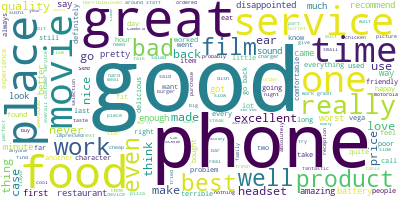

In [20]:
#Generate Word Cloud for train data
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(train_df['Sentence_clean_pre'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

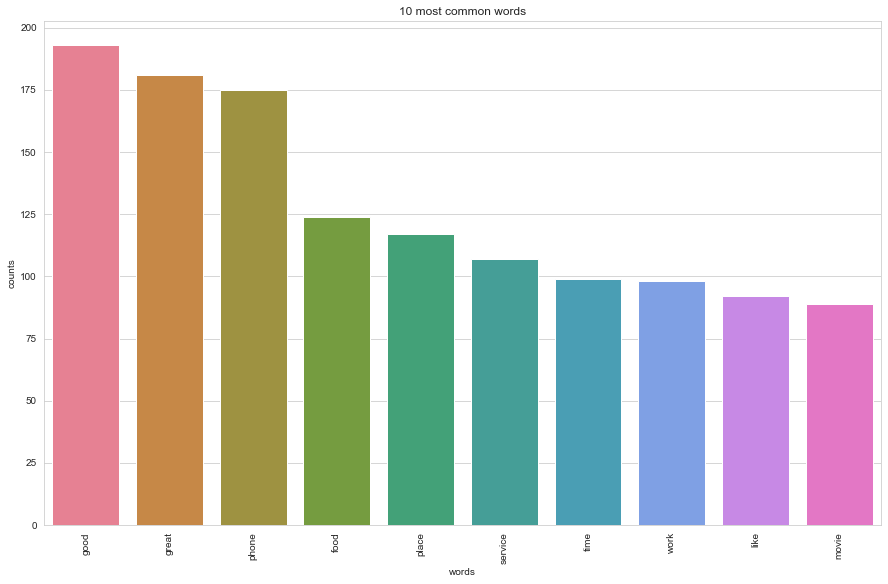

In [21]:
#Plot 10 most common words in train dataset

from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(train_df['Sentence_clean_pre'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

# Q1.b.

In [22]:
#Text to Vector. Creating bag of words.
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=750, lowercase=True, stop_words = 'english', ngram_range=(1, 2))
#fit the vectorizers to the data.

features = vectorizer.fit_transform(train_df['Sentence_clean_pre'])
pandaframe = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())

In [23]:
#Topic Modelling
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=10,
                                      doc_topic_prior=None,
                                      topic_word_prior=None,
                                      max_iter=200, 
                                      learning_method='batch', 
                                      random_state=123,
                                      n_jobs=2,
                                      verbose=0)
lda_output = lda_model.fit(features)

# Log Likelyhood: Higher the better
ll = lda_model.score(features)

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
perp = lda_model.perplexity(features)

In [24]:
# Theta = document-topic matrix
# Beta = components_ = topic-term matrix
theta = pd.DataFrame(lda_model.transform(features))
beta = pd.DataFrame(lda_model.components_)

print('theta:')
theta.head()

#beta
print('beta:')
beta.head()

theta:


,0,1,2,3,4,5,6,7,8,9
0,0.333286,0.037149,0.037166,0.037148,0.037154,0.36949,0.037149,0.037148,0.037156,0.037154
1,0.050014,0.050000,0.050016,0.050003,0.050001,0.05000,0.549955,0.050004,0.050005,0.050001
2,0.050000,0.050000,0.050000,0.050000,0.549995,0.05000,0.050000,0.050000,0.050000,0.050005
3,0.550000,0.050000,0.050000,0.050000,0.050000,0.05000,0.050000,0.050000,0.050000,0.050000
4,0.717467,0.031392,0.031391,0.031392,0.031390,0.03139,0.031392,0.031399,0.031396,0.031391


beta:


,0,1,2,3,4,5,6,7,8,9,...,740,741,742,743,744,745,746,747,748,749
0,0.668341,0.100009,0.100000,0.100000,0.100000,0.100006,0.100003,1.495609,0.100009,0.100000,...,7.793456,0.100005,0.100000,0.100025,0.100000,0.100000,0.10000,0.100000,0.100000,0.1
1,0.100000,7.595676,0.100003,0.100002,0.100001,0.100000,0.100007,0.100010,4.405791,0.100001,...,0.100013,0.100004,0.100000,0.100000,0.100004,0.100000,0.10001,0.100000,0.100000,0.1
2,0.100000,0.100004,0.100006,0.100000,0.100000,0.100003,0.100003,0.100000,0.100000,0.100000,...,0.100001,0.100000,0.100000,1.196880,0.100003,0.100003,0.10000,0.100003,0.100000,0.1
3,0.100000,0.100006,1.498951,0.100003,2.479221,0.100000,0.100011,0.100004,0.100000,0.100000,...,0.100000,0.100006,0.100000,0.100024,0.100029,0.100000,0.10000,1.257544,0.100000,0.1
4,0.100000,0.100013,1.630328,0.100016,0.100001,0.934888,0.100012,2.953485,0.100000,2.595963,...,2.424284,0.100005,0.657176,0.100027,3.197601,0.971201,1.69774,0.100000,0.538938,0.1


In [25]:
# Build Topic Summary
feature_names = vectorizer.get_feature_names()
weight = theta.sum(axis=0)
support50 = (theta > 0.5).sum(axis=0)
support10 = (theta > 0.1).sum(axis=0)
termss = list()
for topic_id, topic in enumerate(lda_model.components_):
    terms = " ".join([feature_names[i] for i in topic.argsort()[:-6 - 1:-1]])
    termss.append(terms)
topic_summary = pd.DataFrame({'TopicID': range(0, len(termss)), "Support50": support50, "Support10": support10, "Weight": weight, "Terms": termss})

In [26]:
#Display topic Summary
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', 0)
topic_summary

,TopicID,Support50,Support10,Weight,Terms
0,0,203,378,258.931859,headset food price good happy use
1,1,147,315,215.922422,delicious time friendly highly staff come
2,2,141,300,214.817521,place good buy quality nice right
3,3,144,282,206.022532,service love horrible think restaurant great
4,4,147,310,216.724332,bad terrible minute piece way fantastic
5,5,129,294,206.614151,disappointed battery product day awesome like
6,6,164,334,231.388991,good ear phone look case pizza
7,7,139,302,212.585913,poor sound movie quality excellent quite
8,8,169,318,224.762154,work great phone recommend problem item
9,9,145,305,214.230125,best worst amazing waste say phone


In [27]:
train_df.columns

Index(['Sentence', 'Polarity', 'word_count', 'char_count', 'reviewChars',
       'reviewPuncts', 'ratiopunChar', 'reviewCwords', 'polarity_score',
       'noun_count', 'verb_count', 'adj_count', 'adv_count', 'pron_count',
       'Sentence_stop', 'Sentence_clean_pre'],
      dtype='object')

In [28]:
#Select features to use in model
train_df1=train_df[['word_count', 'char_count','polarity_score','Polarity','reviewChars','reviewPuncts','ratiopunChar','reviewCwords','noun_count','verb_count','adj_count','adv_count','pron_count']]
train_df2= pd.concat([pandaframe.reset_index(drop=True), train_df1.reset_index(drop=True),theta], axis=1)

In [29]:
#Repace infiniti values with zero, if any to avoid errors when building the model
train_df2.info()
train_df2 = train_df2.replace([np.inf, -np.inf], np.nan)
train_df2["ratiopunChar"]=train_df2["ratiopunChar"].fillna(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Columns: 773 entries, able to 9
dtypes: float64(762), int64(11)
memory usage: 13.0 MB


# Loading, Feature Engineering and Preprocessing the test dataset

The steps should be same as followed for the train dataset

In [30]:
test_df = pd.read_csv("sentiment_test.csv")
test_df.head()
test_df.info()
test_df.shape

,Sentence,Polarity
0,A good commentary of today's love and undoubtedly a film worth seeing.,1
1,"For people who are first timers in film making, I think they did an excellent job!!",1
2,"It was very popular when I was in the cinema, a good house and very good reactions and plenty of...",1
3,It's a feel-good film and that's how I felt when I came out of the cinema!,1
4,It has northern humour and positive about the community it represents.,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  546 non-null    object
 1   Polarity  546 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.7+ KB


(546, 2)

In [31]:
test_df.isna().sum()
test_df["Polarity"].value_counts()

Sentence    0
Polarity    0
dtype: int64

1    297
0    249
Name: Polarity, dtype: int64

In [32]:
#Feature Engineering

#Word Count of each review
test_df['word_count'] = test_df['Sentence'].apply(lambda x: len(str(x).split(" ")))

#Character Count of each review
test_df['char_count'] = test_df['Sentence'].str.len() ## this also includes spaces

#Character count without punctuations
punctuation = ['!','"','#','$','%','&',"'",'(',')','*','+',',','-','.','/',':',';','<','=','>','?','@','[','\\',']','^','_','`','{','|','}','~','``',"''",'--']
def count_characters(data_test_df):
    reviewcharacters = []
    text_col = data_test_df['Sentence']
    for i in text_col:
        a = dict(Counter(i))
        b = {k:v for k, v in a.items() if k not in punctuation}
        c = sum(list(b.values()))
        reviewcharacters.append(c)
    data_test_df['reviewChars'] = reviewcharacters
    return data_test_df['reviewChars']
test_df['reviewChars'] = count_characters(test_df)

#Number of Punctuations

def numpunct(data_test_df):
    reviewPuncts = []
    for i in data_test_df['Sentence']:
        a = dict(Counter(i))
        b = {k:v for k,v in a.items() if k in punctuation}
        c = sum(list(b.values()))
        reviewPuncts.append(c)
    data_test_df['reviewPuncts'] = reviewPuncts
    return data_test_df['reviewPuncts']
test_df['reviewPuncts'] = numpunct(test_df)

# Ratio of Punctuations to reviewc characters
def ratio_puncts_chars(data_test_df):
    return data_test_df['reviewPuncts'] / data_test_df['reviewChars']
test_df['ratiopunChar'] = ratio_puncts_chars(test_df)

#Number of Capital Words
def numcapwords(data_test_df):
    reviewCwords = []
    for i in data_test_df['Sentence']:
        a = i.split()
        b = [word for word in a if word.isupper()]
        c = len(b)
        reviewCwords.append(c)
    data_test_df['reviewCwords'] = reviewCwords
    return data_test_df['reviewCwords']
test_df['reviewCwords'] = numcapwords(test_df)


#Sentiment Analysis 
from textblob import TextBlob
test_df['polarity_score']=test_df['Sentence'].apply(lambda x:TextBlob(x).sentiment.polarity)

#Frequency distribution of Part of Speech Tags
test_df['noun_count'] = test_df['Sentence'].apply(lambda x: check_pos_tag(x, 'noun'))
test_df['verb_count'] = test_df['Sentence'].apply(lambda x: check_pos_tag(x, 'verb'))
test_df['adj_count'] = test_df['Sentence'].apply(lambda x: check_pos_tag(x, 'adj'))
test_df['adv_count'] = test_df['Sentence'].apply(lambda x: check_pos_tag(x, 'adv'))
test_df['pron_count'] = test_df['Sentence'].apply(lambda x: check_pos_tag(x, 'pron'))


In [33]:
#Text Preprocessing

#Word Count of each review
test_df['word_count'] = test_df['Sentence'].apply(lambda x: len(str(x).split(" ")))
#test_df[['Sentence','word_count']].head()


#Character Count of each review
test_df['char_count'] = test_df['Sentence'].str.len() ## this also includes spaces
#test_df[['Sentence','char_count']].head()

# Remove ,,, from entries in name column
test_df['Sentence'] = test_df['Sentence'].str.replace(r'\,,,','')
#test_df['Sentence'].unique()

#Remove contractions from text reviews
# Dictionary of English Contractions
contractions_dict = { "It's":"It is","it's":"it is", "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
test_df['Sentence']=test_df['Sentence'].apply(lambda x:expand_contractions(x))

#Lowercase letters
test_df['Sentence']=test_df['Sentence'].str.lower()

#Remove digits and words containing digits 
test_df['Sentence']=test_df['Sentence'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Remove Punctuations
test_df['Sentence']=test_df['Sentence'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

#Commonly occuring words
freq = pd.Series(' '.join(test_df['Sentence']).split()).value_counts()[:10]
print("Most frequent words")
freq

#removal of commonly occuring irrelevant words
freq = list(freq)
test_df['Sentence'] = test_df['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

#Count of rare words

freq_rare = pd.Series(' '.join(test_df['Sentence']).split()).value_counts()[-10:]
#freq_rare

#removal of rarely occuring irrelevant words
freq_rare = list(freq_rare)
test_df['Sentence'] = test_df['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
from nltk.corpus import stopwords
stop = stopwords.words('english')
test_df['Sentence_stop'] = test_df['Sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#Lemmatization

from textblob import Word
test_df['Sentence_clean_pre'] = test_df['Sentence_stop'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

test_df[["Sentence","Sentence_clean_pre"]].head()
test_df.head()

Most frequent words


the     527
is      338
and     283
a       279
of      232
it      189
this    177
i       177
to      152
in      141
dtype: int64

,Sentence,Sentence_clean_pre
0,a good commentary of today is love and undoubtedly a film worth seeing,good commentary today love undoubtedly film worth seeing
1,for people who are first timers in film making i think they did an excellent job,people first timer film making think excellent job
2,it was very popular when i was in the cinema a good house and very good reactions and plenty of ...,popular cinema good house good reaction plenty laugh
3,it is a feelgood film and that is how i felt when i came out of the cinema,feelgood film felt came cinema
4,it has northern humour and positive about the community it represents,northern humour positive community represents


,Sentence,Polarity,word_count,char_count,reviewChars,reviewPuncts,ratiopunChar,reviewCwords,polarity_score,noun_count,verb_count,adj_count,adv_count,pron_count,Sentence_stop,Sentence_clean_pre
0,a good commentary of today is love and undoubtedly a film worth seeing,1,14,72,70,2,0.028571,1,0.500000,4,1,1,1,0,good commentary today love undoubtedly film worth seeing,good commentary today love undoubtedly film worth seeing
1,for people who are first timers in film making i think they did an excellent job,1,18,85,82,3,0.036585,1,0.625000,5,3,2,0,3,people first timers film making think excellent job,people first timer film making think excellent job
2,it was very popular when i was in the cinema a good house and very good reactions and plenty of ...,1,23,106,104,2,0.019231,1,0.796667,5,2,3,3,2,popular cinema good house good reactions plenty laughs,popular cinema good house good reaction plenty laugh
3,it is a feelgood film and that is how i felt when i came out of the cinema,1,18,76,72,4,0.055556,2,0.000000,2,4,1,3,3,feelgood film felt came cinema,feelgood film felt came cinema
4,it has northern humour and positive about the community it represents,1,13,72,71,1,0.014085,0,0.227273,2,2,2,0,2,northern humour positive community represents,northern humour positive community represents


In [34]:
#Text Vectorizer  

#fit the vectorizers to the data

features1= vectorizer.transform(test_df['Sentence_clean_pre'])
pandaframe1 = pd.DataFrame(features1.toarray(), columns=vectorizer.get_feature_names())

In [35]:
#Topic modelling for test data set
theta_test = pd.DataFrame(lda_model.transform(features1))

In [36]:
# Build Topic Summary
feature_names = vectorizer.get_feature_names()
weight = theta_test.sum(axis=0)
support50 = (theta_test > 0.5).sum(axis=0)
support10 = (theta_test > 0.1).sum(axis=0)
termss = list()
for topic_id, topic in enumerate(lda_model.components_):
    terms = " ".join([feature_names[i] for i in topic.argsort()[:-6 - 1:-1]])
    termss.append(terms)
topic_summary = pd.DataFrame({'TopicID': range(0, len(termss)), "Support50": support50, "Support10": support10, "Weight": weight, "Terms": termss})

In [37]:
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', 0)
topic_summary

,TopicID,Support50,Support10,Weight,Terms
0,0,7,57,37.239182,headset food price good happy use
1,1,20,107,53.654618,delicious time friendly highly staff come
2,2,15,89,48.692857,place good buy quality nice right
3,3,13,55,38.813676,service love horrible think restaurant great
4,4,38,146,71.190132,bad terrible minute piece way fantastic
5,5,14,74,44.940201,disappointed battery product day awesome like
6,6,29,123,64.897378,good ear phone look case pizza
7,7,40,112,63.917918,poor sound movie quality excellent quite
8,8,13,70,45.089434,work great phone recommend problem item
9,9,47,167,77.564604,best worst amazing waste say phone


In [38]:
#Choose Features and combine word features with other features 
test_df1 = test_df[['word_count', 'char_count','polarity_score','Polarity','reviewChars','reviewPuncts','ratiopunChar','reviewCwords','noun_count','verb_count','adj_count','adv_count','pron_count']]
test_df2 = pd.concat([pandaframe1.reset_index(drop=True), test_df1.reset_index(drop=True),theta_test], axis=1)

# Q1.c.

# Machine Learning

In [39]:
# Splitting the pre-processed train dataset into train and test

from sklearn.model_selection import train_test_split
X = train_df2.drop(['Polarity'],axis=1)
y = train_df2['Polarity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [40]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,auc,roc_auc_score,classification_report,confusion_matrix,make_scorer
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1761, 772)
(441, 772)
(1761,)
(441,)


# Logistic Regression Model

In [42]:
# Hypertuning the Logistic Regression Model

parameters_grid = {'penalty':['l1', 'l2'],
                   'dual':[True, False],'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
                   'fit_intercept':[True, False],         
                   'solver':['saga','lbfgs','liblinear']} 

# Create grid search object with cross validating it 5 times  
LogReg_grid = GridSearchCV(LogisticRegression(random_state=42), parameters_grid, cv=5, n_jobs=2, scoring='f1_weighted') 

# Fit on data  
%time LogReg_grid.fit(X_train, y_train) 

LogReg_grid.best_params_ # printing out best parameters


Wall time: 2min 55s


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=2,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'dual': [True, False], 'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2'],
                         'solver': ['saga', 'lbfgs', 'liblinear']},
             scoring='f1_weighted')

{'C': 1,
 'dual': False,
 'fit_intercept': False,
 'penalty': 'l2',
 'solver': 'liblinear'}

Metrics of the logistic regression model after variable selection: 

Confusion matrix:
[[186  37]
 [ 37 181]]

F1 Score = 0.83220
AUC Score = 0.832
Accuracy = 0.832

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       223
           1       0.83      0.83      0.83       218

    accuracy                           0.83       441
   macro avg       0.83      0.83      0.83       441
weighted avg       0.83      0.83      0.83       441



(186, 37, 37, 181)

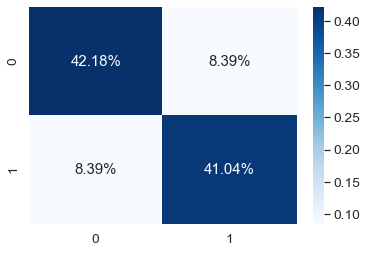

In [43]:
y_pred = LogReg_grid.predict(X_test)

print('Metrics of the logistic regression model after variable selection: \n')

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nF1 Score = {:.5f}".format(f1_score(y_test, y_pred, average="micro")))
print("AUC Score = {:.3f}".format(roc_auc_score(y_test, y_pred)))
print("Accuracy = {:.3f}".format(accuracy_score(y_test, y_pred)))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')


In [44]:
# Making predictions on the test dataset
# Make sure to transform/create the features the same way you did for training
# For now, nothing to do

X_pred = test_df2.drop(['Polarity'], axis=1)

# Using the model to make predictions on the test dataset
pred_test_LR = LogReg_grid.predict(X_pred)

# Output of the predicted results
results_LR = pd.DataFrame({'Sentence': test_df.Sentence, 'Polarity': test_df.Polarity, 'predicted': pred_test_LR})
results_LR.head()

,Sentence,Polarity,predicted
0,a good commentary of today is love and undoubtedly a film worth seeing,1,1
1,for people who are first timers in film making i think they did an excellent job,1,1
2,it was very popular when i was in the cinema a good house and very good reactions and plenty of ...,1,1
3,it is a feelgood film and that is how i felt when i came out of the cinema,1,0
4,it has northern humour and positive about the community it represents,1,1


Confusion matrix:
[[218  31]
 [ 90 207]]

F1 Score = 0.77839
AUC Score = 0.786
Accuracy = 0.778

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.88      0.78       249
           1       0.87      0.70      0.77       297

    accuracy                           0.78       546
   macro avg       0.79      0.79      0.78       546
weighted avg       0.80      0.78      0.78       546



(218, 31, 90, 207)

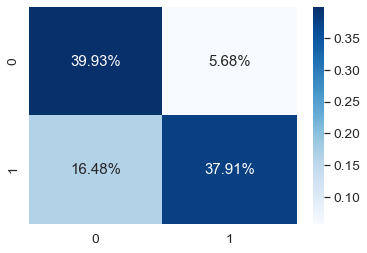

In [45]:
# Checking the metrics for the predicted results of the test dataset
print("Confusion matrix:")
print(confusion_matrix(test_df.Polarity, pred_test_LR))

print("\nF1 Score = {:.5f}".format(f1_score(test_df.Polarity, pred_test_LR, average="micro")))
print("AUC Score = {:.3f}".format(roc_auc_score(test_df.Polarity, pred_test_LR)))
print("Accuracy = {:.3f}".format(accuracy_score(test_df.Polarity, pred_test_LR)))

print("\nClassification Report:")
print(classification_report(test_df.Polarity, pred_test_LR))

tn, fp, fn, tp = confusion_matrix(test_df.Polarity, pred_test_LR).ravel()
(tn, fp, fn, tp)
cf_matrix = confusion_matrix(test_df.Polarity, pred_test_LR)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

# Predictions of the Final model: F1 = 77.8%, accuracy = 77.8%, AUC score = 0.786

In [46]:
# Writing the csv file for the best model
results_LR.to_csv('results_logit.csv', index=False)

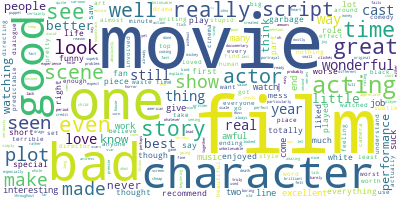

In [47]:
#Generate Word Cloud for test data
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(test_df['Sentence_clean_pre'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [50]:
#Generate Comparison table to determine why some predicitons were incorrect 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pred_test_pd = pd.DataFrame({'predicted': pred_test_LR})
df_test_original = pd.read_csv("sentiment_test.csv") # Original Test data without features
df_test_original_Sentence=df_test_original.drop(columns='Polarity')

array=LogReg_grid.predict_proba(X_pred)
probs= pd.DataFrame({'Prob 0': array[:, 0], 'Prob 1': array[:, 1]})
                                
Comparison=pd.concat([df_test_original_Sentence.reset_index(drop=True),test_df.reset_index(drop=True),pred_test_pd.reset_index(drop=True),probs.reset_index(drop=True),pandaframe1.reset_index(drop=True),theta_test.reset_index(drop=True)],axis=1)

Comparison.head(30)
Comparison.tail(30)

,Sentence,Sentence,Polarity,word_count,char_count,reviewChars,reviewPuncts,ratiopunChar,reviewCwords,polarity_score,noun_count,verb_count,adj_count,adv_count,pron_count,Sentence_stop,Sentence_clean_pre,predicted,Prob 0,Prob 1,able,absolutely,acting,actor,actually,ago,amazing,amazon,ambiance,annoying,anytime,anytime soon,appealing,area,arrived,art,ask,asked,atmosphere,attentive,audio,authentic,average,avoid,away,awesome,awful,bacon,bad,bad food,bar,barely,bargain,basically,bathroom,battery,battery life,bay,bean,beat,beautiful,beef,beer,believe,belt,best,better,big,bit,bite,black,bland,blue,bluetooth,bluetooth headset,book,boot,boring,bother,bought,boy,bread,break,breakfast,bring,broke,buffet,bunch,burger,business,busy,butter,button,buy,buy phone,buy product,buying,cable,cafe,came,camera,camera phone,camerawork,car,car charger,care,case,cast,cell,cell phone,certainly,character,charge,charged,charger,charging,charles,charm,cheap,check,checked,chef,chicken,chinese,chip,choice,cinematography,clarity,classic,clean,clear,clip,close,cold,color,come,comfortable,comfortably,coming,company,complaint,completely,connection,considering,contact,conversation,cooked,cool,cost,couple,course,cover,crap,crazy,cream,crisp,customer,customer service,cut,cute,damn,data,date,day,dead,deal,decent,decision,decor,definitely,definitely worth,delicious,depth,description,deserves,design,despite,dessert,device,dialogue,different,difficult,dining,dinner,direction,director,dirty,disappointed,disappointing,disappointment,dish,doesnt,dont,dont buy,dont waste,drain,drink,drive,drop,dropped,dry,duck,ear,earbud,earpiece,ease,easier,easily,easy,easy use,eat,eaten,eating,editing,effect,effort,egg,embarrassing,end,ended,ending,enjoy,enjoyed,especially,establishment,exactly,excellent,excellent product,excuse,expect,expected,expensive,experience,extra,extremely,eye,fabulous,face,fact,fails,fall,family,fantastic,far,fast,favorite,feature,feel,feel like,feeling,felt,film,finally,fine,fish,fit,fit comfortably,fit ear,flat,flavor,flavorful,flaw,flick,folk,food,food delicious,food good,food great,food service,foot,forced,forever,form,free,fresh,fried,friend,friendly,friendly staff,fry,fun,funny,game,gave,gave star,getting,girl,given,glad,glass,going,gone,good,good food,good phone,good price,good product,good quality,good thing,good way,got,gotten,graphic,great,great deal,great film,great food,great phone,great place,great price,great product,great service,green,guess,guy,half,hand,happened,happier,happy,hard,hate,headphone,headset,hear,heart,help,helpful,high,highly,highly recommend,hilarious,history,hit,hold,hold charge,home,homemade,honest,honestly,hope,horrible,hot,hot dog,hour,hour half,house,huge,human,husband,ice,im,imagination,immediately,important,impressed,included,incredible,inside,instead,instruction,interesting,internet,item,jabra,job,john,joke,junk,kept,keyboard,kid,kind,know,lack,lacked,lacking,lady,large,later,le,leaf,leather,leave,left,let,level,lg,life,light,lightweight,like,like charm,like place,liked,line,list,literally,little,live,location,long,longer,look,looking,lost,lot,loud,love,loved,low,lunch,make,making,man,management,manager,market,massive,maybe,meal,mean,meat,mediocre,memory,menu,mess,mexican,mic,mind,minute,mistake,money,month,motorola,mouth,movie,movie like,music,nearly,need,needed,network,new,nice,night,noise,nokia,note,number,obviously,offer,oh,ok,old,option,order,ordered,original,outlet,outside,outstanding,overall,overpriced,owned,owner,paid,palm,paper,parent,particular,party,passed,pasta,pathetic,patio,pay,pc,people,perfect,perfectly,performance,person,pho,phoenix,phone,picture,piece,piece junk,pizza,place,place eat,plan,plantronics,plastic,play,player,playing,pleasant,pleased,plot,plug,plus,pocket,point,poor,poor quality,poorly,pork,portion,possible,potato,predictable,pretentious,pretty,pretty good,price,price good,priced,probably,problem,product,product price,provided,purchase,purchased,quality,quality sound,quick,quickly,quite,range,rare

,Sentence,Sentence,Polarity,word_count,char_count,reviewChars,reviewPuncts,ratiopunChar,reviewCwords,polarity_score,noun_count,verb_count,adj_count,adv_count,pron_count,Sentence_stop,Sentence_clean_pre,predicted,Prob 0,Prob 1,able,absolutely,acting,actor,actually,ago,amazing,amazon,ambiance,annoying,anytime,anytime soon,appealing,area,arrived,art,ask,asked,atmosphere,attentive,audio,authentic,average,avoid,away,awesome,awful,bacon,bad,bad food,bar,barely,bargain,basically,bathroom,battery,battery life,bay,bean,beat,beautiful,beef,beer,believe,belt,best,better,big,bit,bite,black,bland,blue,bluetooth,bluetooth headset,book,boot,boring,bother,bought,boy,bread,break,breakfast,bring,broke,buffet,bunch,burger,business,busy,butter,button,buy,buy phone,buy product,buying,cable,cafe,came,camera,camera phone,camerawork,car,car charger,care,case,cast,cell,cell phone,certainly,character,charge,charged,charger,charging,charles,charm,cheap,check,checked,chef,chicken,chinese,chip,choice,cinematography,clarity,classic,clean,clear,clip,close,cold,color,come,comfortable,comfortably,coming,company,complaint,completely,connection,considering,contact,conversation,cooked,cool,cost,couple,course,cover,crap,crazy,cream,crisp,customer,customer service,cut,cute,damn,data,date,day,dead,deal,decent,decision,decor,definitely,definitely worth,delicious,depth,description,deserves,design,despite,dessert,device,dialogue,different,difficult,dining,dinner,direction,director,dirty,disappointed,disappointing,disappointment,dish,doesnt,dont,dont buy,dont waste,drain,drink,drive,drop,dropped,dry,duck,ear,earbud,earpiece,ease,easier,easily,easy,easy use,eat,eaten,eating,editing,effect,effort,egg,embarrassing,end,ended,ending,enjoy,enjoyed,especially,establishment,exactly,excellent,excellent product,excuse,expect,expected,expensive,experience,extra,extremely,eye,fabulous,face,fact,fails,fall,family,fantastic,far,fast,favorite,feature,feel,feel like,feeling,felt,film,finally,fine,fish,fit,fit comfortably,fit ear,flat,flavor,flavorful,flaw,flick,folk,food,food delicious,food good,food great,food service,foot,forced,forever,form,free,fresh,fried,friend,friendly,friendly staff,fry,fun,funny,game,gave,gave star,getting,girl,given,glad,glass,going,gone,good,good food,good phone,good price,good product,good quality,good thing,good way,got,gotten,graphic,great,great deal,great film,great food,great phone,great place,great price,great product,great service,green,guess,guy,half,hand,happened,happier,happy,hard,hate,headphone,headset,hear,heart,help,helpful,high,highly,highly recommend,hilarious,history,hit,hold,hold charge,home,homemade,honest,honestly,hope,horrible,hot,hot dog,hour,hour half,house,huge,human,husband,ice,im,imagination,immediately,important,impressed,included,incredible,inside,instead,instruction,interesting,internet,item,jabra,job,john,joke,junk,kept,keyboard,kid,kind,know,lack,lacked,lacking,lady,large,later,le,leaf,leather,leave,left,let,level,lg,life,light,lightweight,like,like charm,like place,liked,line,list,literally,little,live,location,long,longer,look,looking,lost,lot,loud,love,loved,low,lunch,make,making,man,management,manager,market,massive,maybe,meal,mean,meat,mediocre,memory,menu,mess,mexican,mic,mind,minute,mistake,money,month,motorola,mouth,movie,movie like,music,nearly,need,needed,network,new,nice,night,noise,nokia,note,number,obviously,offer,oh,ok,old,option,order,ordered,original,outlet,outside,outstanding,overall,overpriced,owned,owner,paid,palm,paper,parent,particular,party,passed,pasta,pathetic,patio,pay,pc,people,perfect,perfectly,performance,person,pho,phoenix,phone,picture,piece,piece junk,pizza,place,place eat,plan,plantronics,plastic,play,player,playing,pleasant,pleased,plot,plug,plus,pocket,point,poor,poor quality,poorly,pork,portion,possible,potato,predictable,pretentious,pretty,pretty good,price,price good,priced,probably,problem,product,product price,provided,purchase,purchased,quality,quality sound,quick,quickly,quite,range,rare

# Random Forest Model

In [51]:
# Without hypertuning. This model is to check the most important features
# Define a random forest model and call it classifier_RF
classifier_RF = RandomForestClassifier(random_state=42) # recall what random_state mean

# Train the model classifier_RF on the training data
classifier_RF.fit(X_train, y_train)

y_pred = classifier_RF.predict(X_test)

print('Metrics of the logistic regression model after variable selection: \n')

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nF1 Score = {:.5f}".format(f1_score(y_test, y_pred, average="micro")))
print("AUC Score = {:.3f}".format(roc_auc_score(y_test, y_pred)))
print("Accuracy = {:.3f}".format(accuracy_score(y_test, y_pred)))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


RandomForestClassifier(random_state=42)

Metrics of the logistic regression model after variable selection: 

Confusion matrix:
[[183  40]
 [ 46 172]]

F1 Score = 0.80499
AUC Score = 0.805
Accuracy = 0.805

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       223
           1       0.81      0.79      0.80       218

    accuracy                           0.80       441
   macro avg       0.81      0.80      0.80       441
weighted avg       0.81      0.80      0.80       441



In [52]:
# Using the model to make predictions on the test dataset
pred_test_RF = classifier_RF.predict(X_pred)

# Checking the metrics for the predicted results of the test dataset
print("Confusion matrix:")
print(confusion_matrix(test_df.Polarity, pred_test_RF))

print("\nF1 Score = {:.5f}".format(f1_score(test_df.Polarity, pred_test_RF, average="micro")))
print("AUC Score = {:.3f}".format(roc_auc_score(test_df.Polarity, pred_test_RF)))
print("Accuracy = {:.3f}".format(accuracy_score(test_df.Polarity, pred_test_RF)))

print("\nClassification Report:")
print(classification_report(test_df.Polarity, pred_test_RF))


Confusion matrix:
[[217  32]
 [102 195]]

F1 Score = 0.75458
AUC Score = 0.764
Accuracy = 0.755

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.87      0.76       249
           1       0.86      0.66      0.74       297

    accuracy                           0.75       546
   macro avg       0.77      0.76      0.75       546
weighted avg       0.78      0.75      0.75       546



<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, 'Feature Importance')

Text(0.5, 0, 'Decrease in Gini (recal, Gini = 2*AUC-1)')

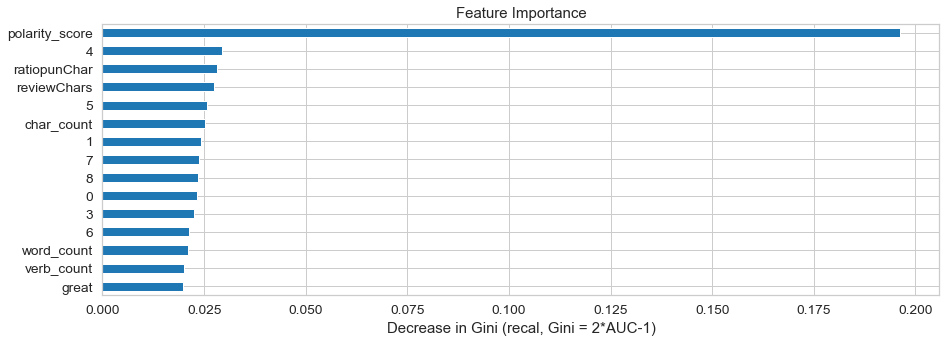

In [53]:
# Tree models do not have coefficients, but have easily-interpretable tree plots
# But in tree ensembles (such as random forect) there is no point to look at individual trees

# Useful intuition, however, can be obtained from the Feature Importance Plots

# calculate feature importances
importances = classifier_RF.feature_importances_ 

# plot them
plt.figure(figsize=(15,5))
plt.title('Feature Importance')
plt.xlabel('Decrease in Gini (recal, Gini = 2*AUC-1)')
feature_importances = pd.Series(classifier_RF.feature_importances_, index=X_train.columns)
feature_importances.nlargest(15).sort_values().plot(kind='barh', align='center')

In [54]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
feature_names = vectorizer.get_feature_names()+['polarity_score','word_count','reviewChars','ratiopunChar','wow_count','highly_count']
len(feature_names)


feature_importances = classifier_RF.feature_importances_

feat_imp= pd.concat([pd.DataFrame(feature_names,columns=["Feature_Names"],dtype=str).reset_index(drop=True),pd.DataFrame(feature_importances,columns=["Feature_Importance"],dtype=float).reset_index(drop=True) ], axis=1)

#feat_imp['Feature_Importance']=feat_imp['Feature_Importance'].round(5)
#feat_imp.sort_values(by="Feature_Importance",ascending=False).head(10)

756

In [55]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
predictions=pd.DataFrame(pred_test_RF,columns=['Predicted'])
compare=pd.concat([test_df.reset_index(drop=True),predictions.reset_index(drop=True),pandaframe1.reset_index(drop=True)],axis=1)

compare.head()
compare.tail()

,Sentence,Polarity,word_count,char_count,reviewChars,reviewPuncts,ratiopunChar,reviewCwords,polarity_score,noun_count,verb_count,adj_count,adv_count,pron_count,Sentence_stop,Sentence_clean_pre,Predicted,able,absolutely,acting,actor,actually,ago,amazing,amazon,ambiance,annoying,anytime,anytime soon,appealing,area,arrived,art,ask,asked,atmosphere,attentive,audio,authentic,average,avoid,away,awesome,awful,bacon,bad,bad food,bar,barely,bargain,basically,bathroom,battery,battery life,bay,bean,beat,beautiful,beef,beer,believe,belt,best,better,big,bit,bite,black,bland,blue,bluetooth,bluetooth headset,book,boot,boring,bother,bought,boy,bread,break,breakfast,bring,broke,buffet,bunch,burger,business,busy,butter,button,buy,buy phone,buy product,buying,cable,cafe,came,camera,camera phone,camerawork,car,car charger,care,case,cast,cell,cell phone,certainly,character,charge,charged,charger,charging,charles,charm,cheap,check,checked,chef,chicken,chinese,chip,choice,cinematography,clarity,classic,clean,clear,clip,close,cold,color,come,comfortable,comfortably,coming,company,complaint,completely,connection,considering,contact,conversation,cooked,cool,cost,couple,course,cover,crap,crazy,cream,crisp,customer,customer service,cut,cute,damn,data,date,day,dead,deal,decent,decision,decor,definitely,definitely worth,delicious,depth,description,deserves,design,despite,dessert,device,dialogue,different,difficult,dining,dinner,direction,director,dirty,disappointed,disappointing,disappointment,dish,doesnt,dont,dont buy,dont waste,drain,drink,drive,drop,dropped,dry,duck,ear,earbud,earpiece,ease,easier,easily,easy,easy use,eat,eaten,eating,editing,effect,effort,egg,embarrassing,end,ended,ending,enjoy,enjoyed,especially,establishment,exactly,excellent,excellent product,excuse,expect,expected,expensive,experience,extra,extremely,eye,fabulous,face,fact,fails,fall,family,fantastic,far,fast,favorite,feature,feel,feel like,feeling,felt,film,finally,fine,fish,fit,fit comfortably,fit ear,flat,flavor,flavorful,flaw,flick,folk,food,food delicious,food good,food great,food service,foot,forced,forever,form,free,fresh,fried,friend,friendly,friendly staff,fry,fun,funny,game,gave,gave star,getting,girl,given,glad,glass,going,gone,good,good food,good phone,good price,good product,good quality,good thing,good way,got,gotten,graphic,great,great deal,great film,great food,great phone,great place,great price,great product,great service,green,guess,guy,half,hand,happened,happier,happy,hard,hate,headphone,headset,hear,heart,help,helpful,high,highly,highly recommend,hilarious,history,hit,hold,hold charge,home,homemade,honest,honestly,hope,horrible,hot,hot dog,hour,hour half,house,huge,human,husband,ice,im,imagination,immediately,important,impressed,included,incredible,inside,instead,instruction,interesting,internet,item,jabra,job,john,joke,junk,kept,keyboard,kid,kind,know,lack,lacked,lacking,lady,large,later,le,leaf,leather,leave,left,let,level,lg,life,light,lightweight,like,like charm,like place,liked,line,list,literally,little,live,location,long,longer,look,looking,lost,lot,loud,love,loved,low,lunch,make,making,man,management,manager,market,massive,maybe,meal,mean,meat,mediocre,memory,menu,mess,mexican,mic,mind,minute,mistake,money,month,motorola,mouth,movie,movie like,music,nearly,need,needed,network,new,nice,night,noise,nokia,note,number,obviously,offer,oh,ok,old,option,order,ordered,original,outlet,outside,outstanding,overall,overpriced,owned,owner,paid,palm,paper,parent,particular,party,passed,pasta,pathetic,patio,pay,pc,people,perfect,perfectly,performance,person,pho,phoenix,phone,picture,piece,piece junk,pizza,place,place eat,plan,plantronics,plastic,play,player,playing,pleasant,pleased,plot,plug,plus,pocket,point,poor,poor quality,poorly,pork,portion,possible,potato,predictable,pretentious,pretty,pretty good,price,price good,priced,probably,problem,product,product price,provided,purchase,purchased,quality,quality sound,quick,quickly,quite,range,rare,rated,rating,ray,ray c

,Sentence,Polarity,word_count,char_count,reviewChars,reviewPuncts,ratiopunChar,reviewCwords,polarity_score,noun_count,verb_count,adj_count,adv_count,pron_count,Sentence_stop,Sentence_clean_pre,Predicted,able,absolutely,acting,actor,actually,ago,amazing,amazon,ambiance,annoying,anytime,anytime soon,appealing,area,arrived,art,ask,asked,atmosphere,attentive,audio,authentic,average,avoid,away,awesome,awful,bacon,bad,bad food,bar,barely,bargain,basically,bathroom,battery,battery life,bay,bean,beat,beautiful,beef,beer,believe,belt,best,better,big,bit,bite,black,bland,blue,bluetooth,bluetooth headset,book,boot,boring,bother,bought,boy,bread,break,breakfast,bring,broke,buffet,bunch,burger,business,busy,butter,button,buy,buy phone,buy product,buying,cable,cafe,came,camera,camera phone,camerawork,car,car charger,care,case,cast,cell,cell phone,certainly,character,charge,charged,charger,charging,charles,charm,cheap,check,checked,chef,chicken,chinese,chip,choice,cinematography,clarity,classic,clean,clear,clip,close,cold,color,come,comfortable,comfortably,coming,company,complaint,completely,connection,considering,contact,conversation,cooked,cool,cost,couple,course,cover,crap,crazy,cream,crisp,customer,customer service,cut,cute,damn,data,date,day,dead,deal,decent,decision,decor,definitely,definitely worth,delicious,depth,description,deserves,design,despite,dessert,device,dialogue,different,difficult,dining,dinner,direction,director,dirty,disappointed,disappointing,disappointment,dish,doesnt,dont,dont buy,dont waste,drain,drink,drive,drop,dropped,dry,duck,ear,earbud,earpiece,ease,easier,easily,easy,easy use,eat,eaten,eating,editing,effect,effort,egg,embarrassing,end,ended,ending,enjoy,enjoyed,especially,establishment,exactly,excellent,excellent product,excuse,expect,expected,expensive,experience,extra,extremely,eye,fabulous,face,fact,fails,fall,family,fantastic,far,fast,favorite,feature,feel,feel like,feeling,felt,film,finally,fine,fish,fit,fit comfortably,fit ear,flat,flavor,flavorful,flaw,flick,folk,food,food delicious,food good,food great,food service,foot,forced,forever,form,free,fresh,fried,friend,friendly,friendly staff,fry,fun,funny,game,gave,gave star,getting,girl,given,glad,glass,going,gone,good,good food,good phone,good price,good product,good quality,good thing,good way,got,gotten,graphic,great,great deal,great film,great food,great phone,great place,great price,great product,great service,green,guess,guy,half,hand,happened,happier,happy,hard,hate,headphone,headset,hear,heart,help,helpful,high,highly,highly recommend,hilarious,history,hit,hold,hold charge,home,homemade,honest,honestly,hope,horrible,hot,hot dog,hour,hour half,house,huge,human,husband,ice,im,imagination,immediately,important,impressed,included,incredible,inside,instead,instruction,interesting,internet,item,jabra,job,john,joke,junk,kept,keyboard,kid,kind,know,lack,lacked,lacking,lady,large,later,le,leaf,leather,leave,left,let,level,lg,life,light,lightweight,like,like charm,like place,liked,line,list,literally,little,live,location,long,longer,look,looking,lost,lot,loud,love,loved,low,lunch,make,making,man,management,manager,market,massive,maybe,meal,mean,meat,mediocre,memory,menu,mess,mexican,mic,mind,minute,mistake,money,month,motorola,mouth,movie,movie like,music,nearly,need,needed,network,new,nice,night,noise,nokia,note,number,obviously,offer,oh,ok,old,option,order,ordered,original,outlet,outside,outstanding,overall,overpriced,owned,owner,paid,palm,paper,parent,particular,party,passed,pasta,pathetic,patio,pay,pc,people,perfect,perfectly,performance,person,pho,phoenix,phone,picture,piece,piece junk,pizza,place,place eat,plan,plantronics,plastic,play,player,playing,pleasant,pleased,plot,plug,plus,pocket,point,poor,poor quality,poorly,pork,portion,possible,potato,predictable,pretentious,pretty,pretty good,price,price good,priced,probably,problem,product,product price,provided,purchase,purchased,quality,quality sound,quick,quickly,quite,range,rare,rated,rating,ray,ray c

In [56]:
test_df.shape

(546, 16)

In [57]:
X_pred.shape

(546, 772)

In [58]:
y_testdata = test_df.Polarity
y_testdata.shape

(546,)

In [ ]:
from treeinterpreter import treeinterpreter as ti

prediction, bias, contributions = ti.predict(classifier_RF, X_pred)

for i in range(len(test_df2)):
        if y_testdata[i] == pred_test_RF[i]:
            continue
        print("Instance {}".format(i))
        #test_df2.iloc[i, :].Sentences
        print("Bias (trainset mean) {}".format(bias[i]))
        print("Truth {}".format(y_testdata[i]))
        print("Prediction {}".format(prediction[i, :]))
        print("Feature contributions:")
        con = pd.DataFrame(data={'feature': feature_names,
                                 'value': X_pred.iloc[i],
                                 'legit contr': contributions[i][:, 0],
                                 'Polarity contr': contributions[i][:, 1],
                                 'abs Polarity contr': abs(contributions[i][:, 1])})
        con = con.sort_values(by="abs Polarity contr", ascending=False)
        con['Polarity cumulative'] = con['Polarity contr'].cumsum() + bias[i][1]
        con.head(30)
        print("-"*20)